In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob
from astropy.io import fits

In [3]:
figsize(8,6)

In [4]:
def naive_map(data,ra,dec,ra_num_bins=60,dec_num_bins=50):
    ra_bins = np.linspace(ra.min(),ra.max(),ra_num_bins)
    dec_bins = np.linspace(dec.min(),dec.max(),dec_num_bins)
    p,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins),weights=data)
    hits,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins))
    return p.T, hits.T, ra_bins, dec_bins

In [5]:
def get_data(bank='A', session=5):
    fnames = glob.glob('/data2/GBT/S140/Daisy/*/*_0'+str(session)+'_*'+bank+'*.rfireduced_new.npz')
    fnames.sort()
    calibrations = np.load('/home/mabitbol/GBT-S140/calibrations/calibration_3C295_0'+str(session)+'_'+bank+'.npy').item()
    fdiode = calibrations['freqs']
    pdiode = calibrations['pdiode']
    pdiode1 = calibrations['pdiode1']
    meanpower = 0.5 * (pdiode + pdiode1)
    calibrated = [] 
    ras = []
    decs = []
    azs = []
    els = []
    raw = []
    for fname in fnames:
        nz = np.load(fname)
        ra = nz['sra']
        dec = nz['sdec']
        mask = nz['valid']
        az = nz['AZIMUTH'][::8]
        el = nz['ELEVATIO'][::8]
        freqs = nz['freqs']
            
        gain = meanpower / ( nz['xxon'] - nz['xxoff'])
        calibd = nz['xxoff'] * gain
        
        mask[:200] = False
        mask[400:] = False
    
        calibd = calibd[:, mask]

        calibrated = np.concatenate([calibrated, np.nanmean(calibd - np.nanmedian(calibd,0), 1)])
        raw = np.concatenate([raw, np.nanmean(calibd, 1)])
        ras = np.concatenate([ras, ra])
        decs = np.concatenate([decs, dec])
        azs = np.concatenate([azs, az])
        els = np.concatenate([els, el])
    return raw, calibrated, ras, decs, azs, els

In [8]:
raw, calib, ras, decs, azs, els = get_data('A')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: Mean of empty slice
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: Mean of empty slice


In [9]:
ts = np.arange(len(calib))
tmask = (ts < 42000) | (ts > 50000 )

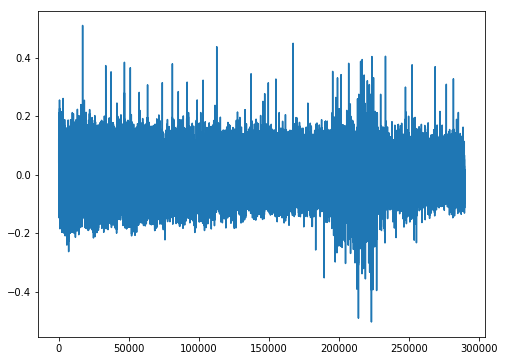

In [10]:
plot(calib[tmask])

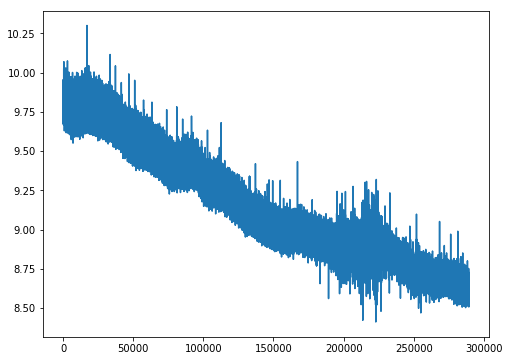

In [11]:
plot(raw[tmask])

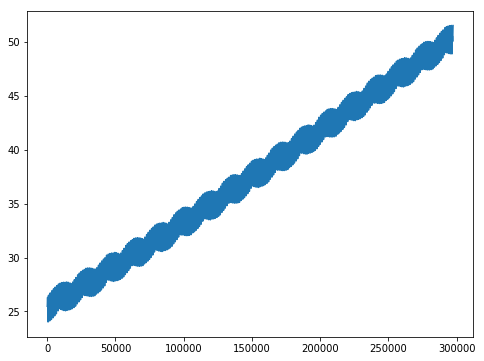

In [12]:
plot(els)

In [19]:
from __future__ import unicode_literals

figsize(8, 6)

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
    
rcParams['xtick.labelsize'] = 20
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.major.pad'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1

rcParams['ytick.labelsize'] = 20
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.major.pad'] = 10
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1

rcParams['legend.fontsize'] = 24
rcParams['legend.borderaxespad'] = 1

rcParams['axes.labelsize'] = 24
rcParams['axes.titlesize'] = 24

In [34]:
decs[:10000].min()

62.035467730577054

In [33]:
decs[:10000].max()

64.842540652573319

In [32]:
ras[:10000].min()

332.74752704566572

In [31]:
ras[:10000].max()

338.95021219399911

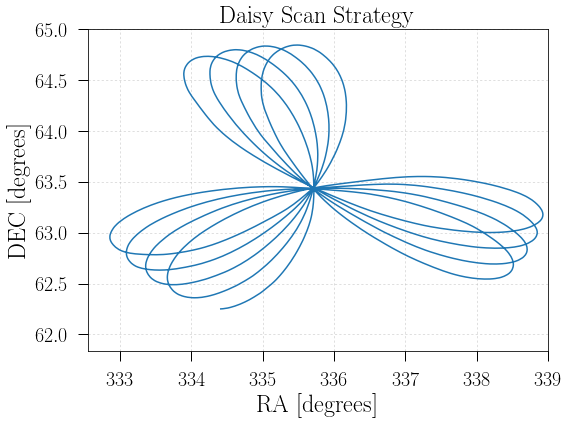

In [48]:
plot(ras[:5000], decs[:5000])
grid(ls='dotted', alpha=0.5)
ylim(decs[:10000].min()-0.2, 65)
xlim(ras[:10000].min()-0.2, 339)
xlabel('$\mathrm{RA\ [degrees]}$')
ylabel('$\mathrm{DEC\ [degrees]}$')
title('$\mathrm{Daisy\ Scan\ Strategy}$')
tight_layout()
savefig('daisyscan.pdf', format='pdf')

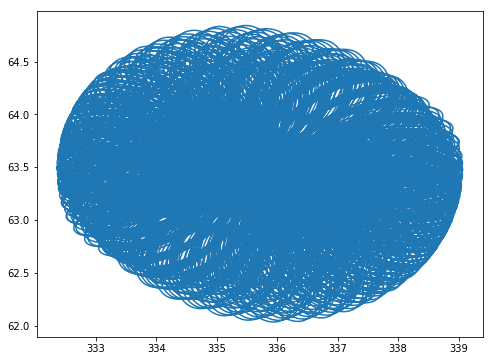

In [15]:
plot(ras, decs)